# 3rd round school inspection multipleregression analysis

## This is prediction model for identifying the most correlated aspects of schools performance 

### 1) Overall Performance
### 2) School Community engagements
### 3) Financial resource
### 4) Participatory school improvment plan
### 5) Learning Effectivness
### 6) Teaching Effectivness
### 7) Record information of girls and students with special need education and support
### 8) Monitoring and evaluation by school leaders on the implmentations of plans and effective utilizations of resources
### 9) school internal_efficiency
### 10) Student attainment
### 11) personal development and 
#### prepared by Alamerewu Aklilu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


import warnings
warnings.filterwarnings('ignore')

In [4]:
ins_data = pd.read_csv("C:\Users\menad\Desktop\Jupyter Notebook projects\third round\third_round.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3866286685.py, line 1)

In [50]:
school_data = ins_data[["perf","fin","sip","learn","teach","snie","mer","inteff","attain","perdev","pareng"]]

In [51]:
school_data.describe()

,perf,fin,sip,learn,teach,snie,mer,inteff,attain,perdev,pareng
count,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000
mean,58.802980,57.335307,59.314392,60.188903,59.625848,51.243434,60.227294,60.649604,56.178302,64.017572,59.093305
std,9.712449,14.604777,16.023809,10.727235,10.764459,16.119434,12.266326,13.461003,13.282789,13.002045,12.445947
min,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
25%,52.000000,48.000000,49.000000,53.000000,52.250000,38.000000,52.000000,50.000000,50.000000,55.000000,50.000000
50%,59.000000,58.000000,60.000000,60.000000,60.250000,50.000000,60.000000,60.000000,56.000000,65.000000,59.000000
75%,66.000000,68.000000,72.000000,68.000000,67.500000,63.000000,70.000000,71.000000,63.000000,75.000000,69.000000
max,95.000000,100.000000,100.000000,100.000000,98.250000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [52]:
school_data.shape

(10471, 11)

In [53]:
school_data.dtypes

perf        int64
fin         int64
sip         int64
learn       int64
teach     float64
snie        int64
mer         int64
inteff      int64
attain      int64
perdev      int64
pareng      int64
dtype: object

In [54]:
#total not available data
school_data.isna().sum()

perf      0
fin       0
sip       0
learn     0
teach     0
snie      0
mer       0
inteff    0
attain    0
perdev    0
pareng    0
dtype: int64

In [55]:
#Model Building
model = smf.ols(formula='perf ~ fin + sip + learn + teach + snie + mer + inteff + attain + perdev + pareng', data=school_data).fit()


In [56]:
model.params

Intercept    1.123100
fin          0.068924
sip          0.094438
learn        0.101935
teach        0.152845
snie         0.039699
mer          0.082383
inteff       0.092391
attain       0.088015
perdev       0.115862
pareng       0.133967
dtype: float64

# The Akaike information criterion (AIC) 
The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

the number of independent variables used to build the model.
the maximum likelihood estimate of the model (how well the model reproduces the data).
The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.
# Bayesian Information Criterion (BIC)
BIC, or the Bayesian Information Criterion, is a statistical tool that is used to compare the goodness of fit of two models. BIC is based on the idea that the best model is the one that maximizes the likelihood of the data, while also penalizing the number of parameters in the model. This ensures that the model is not overfitted to the data. BIC can be used in a variety of settings, including regression analysis and machine learning. In general, BIC is a valuable tool for statisticians and data scientists who need to compare different models.

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   perf   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.995e+04
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:13:40   Log-Likelihood:                -18312.
No. Observations:               10471   AIC:                         3.665e+04
Df Residuals:                   10460   BIC:                         3.673e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1231      0.086     13.045      0.000       0.954       1.292
fin            0.0689      0.001     53.696      0.000       0.066       0.071
sip            0.0944      0.001     84.686      0.000       0.092       0.097
learn          0.1019      0.002     45.775      0.000       0.098       0.106
teach          0.1528      0.002     61.948      0.000       0.148       0.158
snie           0.0397      0.001     36.634      0.000       0.038       0.042
mer            0.0824      0.002     44.981      0.000       0.079       0.086
inteff         0.0924      0.001     66.550      0.000       0.090       0.095
attain         0.0880      0.001     67.477      0.000       0.085       0.091
perdev         0.1159      0.002     76.323      0.000       0.113       0.119
pareng         0.1340      0.002     77.246      0.000       0.131       0.137
==============================================================================
Omnibus:                      147.049   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.043
Skew:                          -0.053   Prob(JB):                     3.78e-59
Kurtosis:                       3.778   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model.rsquared.round(3), model.rsquared_adj.round(3)

(0.979, 0.979)

In [59]:
slr1 = smf.ols(formula='perf ~ sip', data=school_data).fit()

In [60]:
slr1.params

Intercept    33.285407
sip           0.430209
dtype: float64

In [61]:
# sip has significant p-value
slr1.pvalues.round(5), slr1.tvalues.round(5)  

(Intercept    0.0
 sip          0.0
 dtype: float64,
 Intercept    129.82173
 sip          103.09261
 dtype: float64)

In [62]:
slr2 = smf.ols(formula='perf ~ teach', data=school_data).fit()

In [63]:
slr2.params

Intercept    12.307979
teach         0.779779
dtype: float64

In [64]:
# Doors has significant p-value
slr2.pvalues.round(5), slr2.tvalues.round(5)  

(Intercept    0.0
 teach        0.0
 dtype: float64,
 Intercept     45.78993
 teach        175.77343
 dtype: float64)

In [65]:
mlr = smf.ols(formula='perf ~ learn + teach ', data=school_data).fit()

In [66]:
mlr.params

Intercept    7.738396
learn        0.344405
teach        0.508760
dtype: float64

In [67]:
# learn + teach have significant pvalue
mlr.pvalues.round(5), mlr.tvalues.round(5)  

(Intercept    0.0
 learn        0.0
 teach        0.0
 dtype: float64,
 Intercept    30.59390
 learn        53.58050
 teach        79.42462
 dtype: float64)

In [25]:
#Model Validation Techniques
#1. Multicoliinearity check
#Correlation & Heat Map Analysis
#Using VIF
#Correlation Analysis

In [68]:
heatmp = school_data.corr()
heatmp.round(2)

,perf,fin,sip,learn,teach,snie,mer,inteff,attain,perdev,pareng
perf,1.00,0.72,0.71,0.83,0.86,0.62,0.81,0.73,0.65,0.76,0.82
fin,0.72,1.00,0.52,0.57,0.61,0.42,0.57,0.48,0.38,0.47,0.60
sip,0.71,0.52,1.00,0.54,0.59,0.44,0.56,0.43,0.36,0.43,0.50
learn,0.83,0.57,0.54,1.00,0.79,0.51,0.67,0.55,0.47,0.60,0.64
teach,0.86,0.61,0.59,0.79,1.00,0.56,0.74,0.56,0.49,0.60,0.66
snie,0.62,0.42,0.44,0.51,0.56,1.00,0.53,0.40,0.42,0.33,0.47
mer,0.81,0.57,0.56,0.67,0.74,0.53,1.00,0.53,0.44,0.54,0.67
inteff,0.73,0.48,0.43,0.55,0.56,0.40,0.53,1.00,0.53,0.57,0.54
attain,0.65,0.38,0.36,0.47,0.49,0.42,0.44,0.53,1.00,0.50,0.47
perdev,0.76,0.47,0.43,0.60,0.60,0.33,0.54,0.57,0.50,1.00,0.63


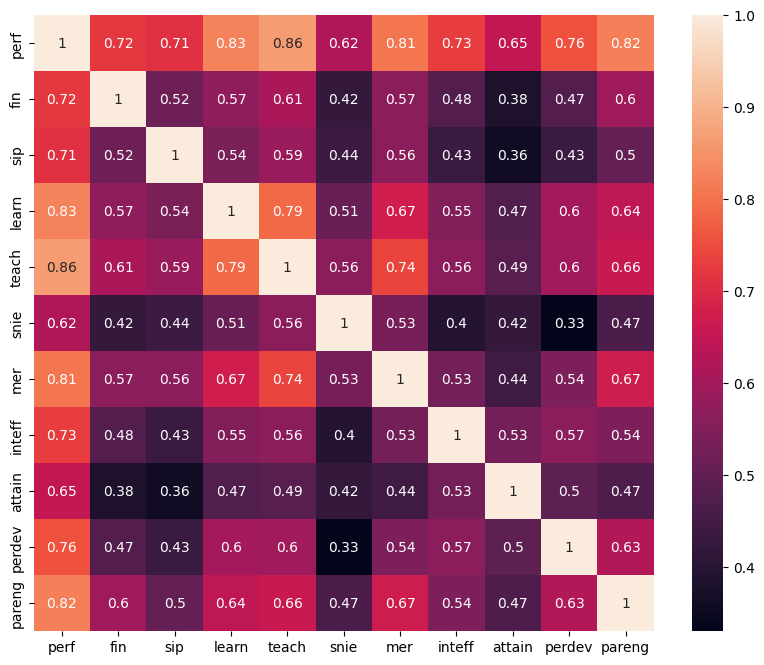

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmp, annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmp, annot=True)
plt.show()

In [28]:
#Calculate VIF = 1/(1-Rsquare) for all independent variables

# Quantile-Quantile plot
A residual is the difference between the observed value and the mean value that the model predicts for that observation.

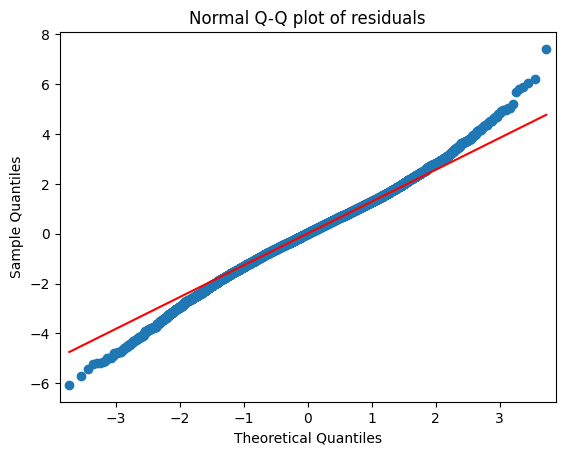

In [26]:
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
# outlier detection from above QQ plot of residuals
list(np.where(model.resid>6))  

[array([1230, 1292, 2956], dtype=int64)]

In [30]:
# outlier detection from above QQ plot of residuals
list(np.where(model.resid<-6))  

[array([9074], dtype=int64)]

In [31]:
#3. Homoscedasticity check
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
#Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
#Using Residual Regression Plots

In [32]:
# User defined z = (x - mu)/sigma
def standardised_values(val):
    return (val - val.mean())/val.std()            

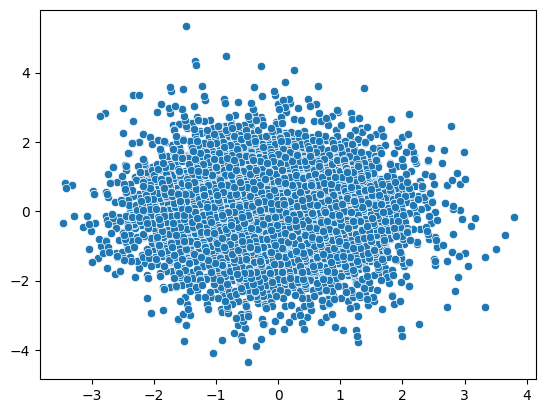

In [33]:
sns.scatterplot(x=standardised_values(model.fittedvalues), y=standardised_values(model.resid))
plt.show()

eval_env: 1


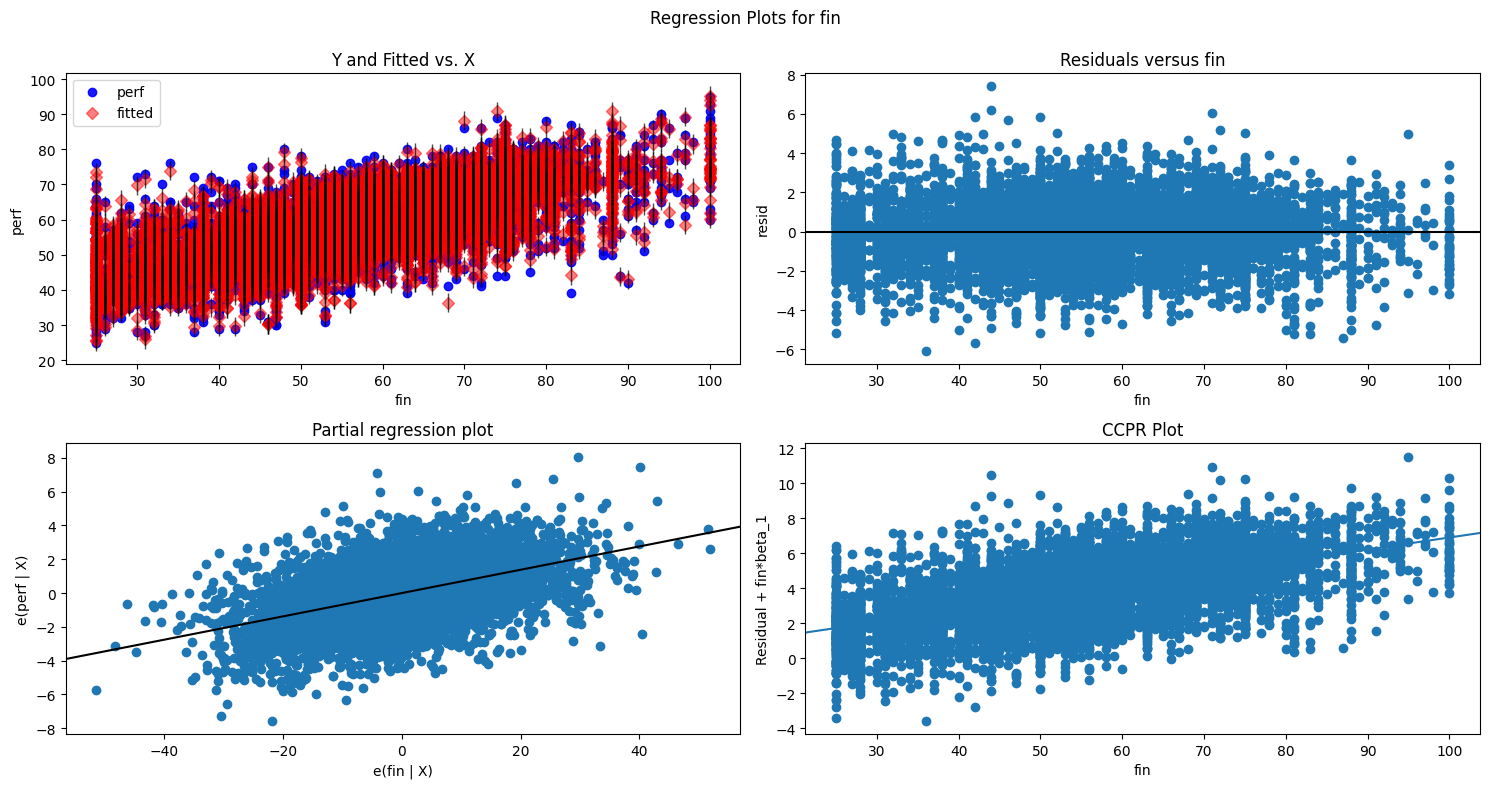

In [34]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'fin', fig = fig)
plt.show()

# Generates a component and component-plus-residual (CCPR) plot.

The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables

eval_env: 1


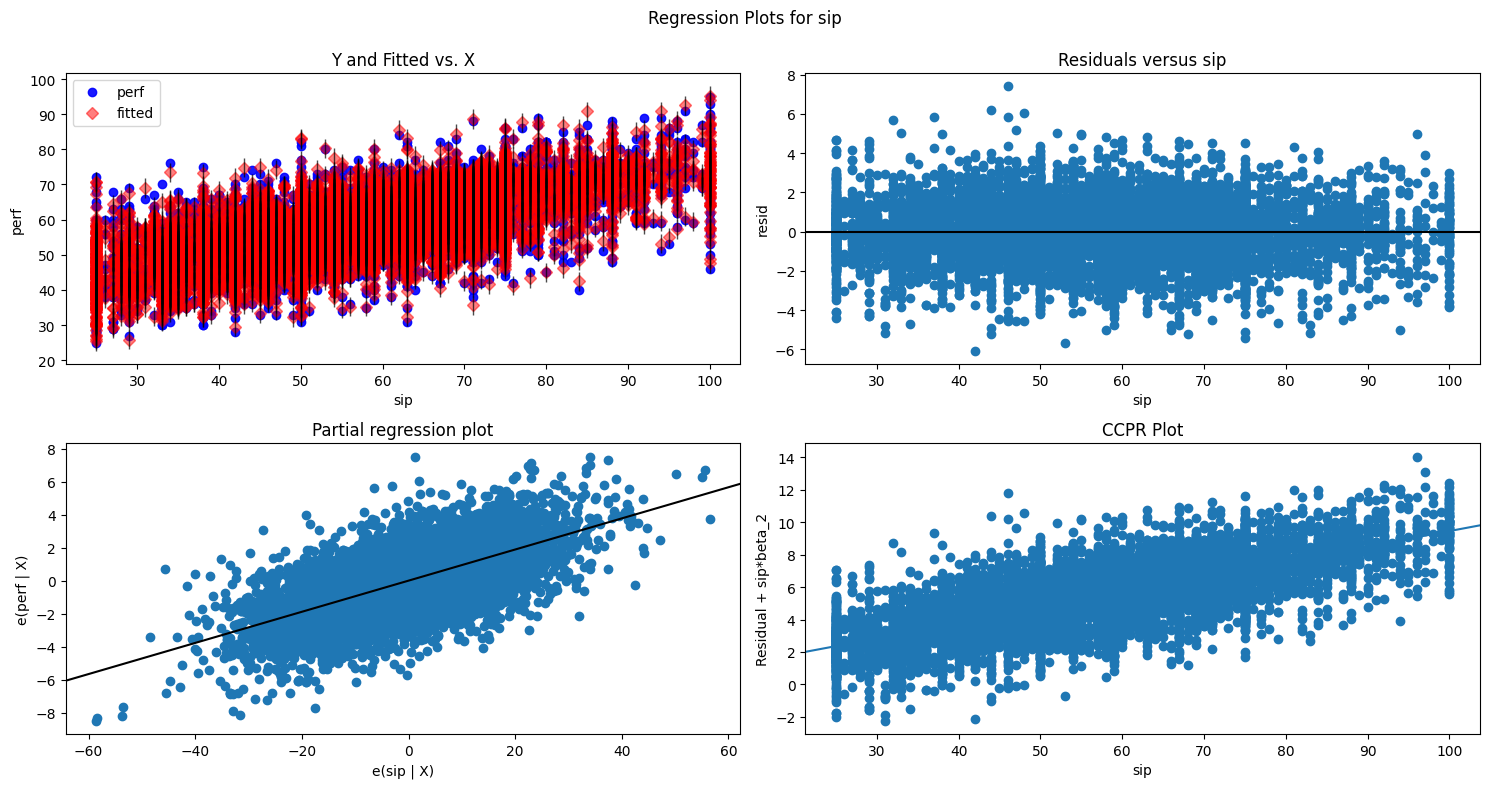

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'sip', fig = fig)
plt.show()

eval_env: 1


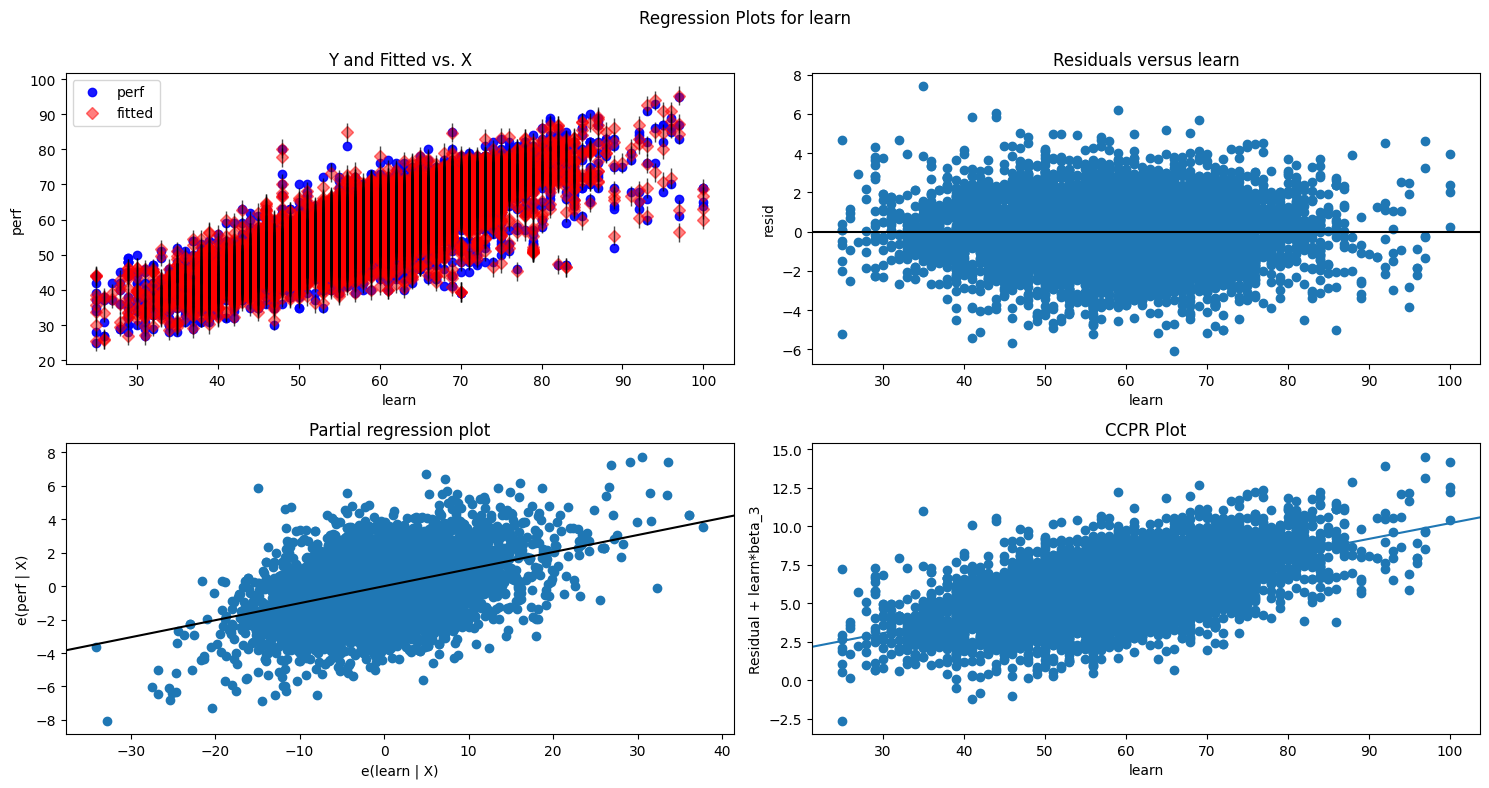

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'learn', fig = fig)
plt.show()

eval_env: 1


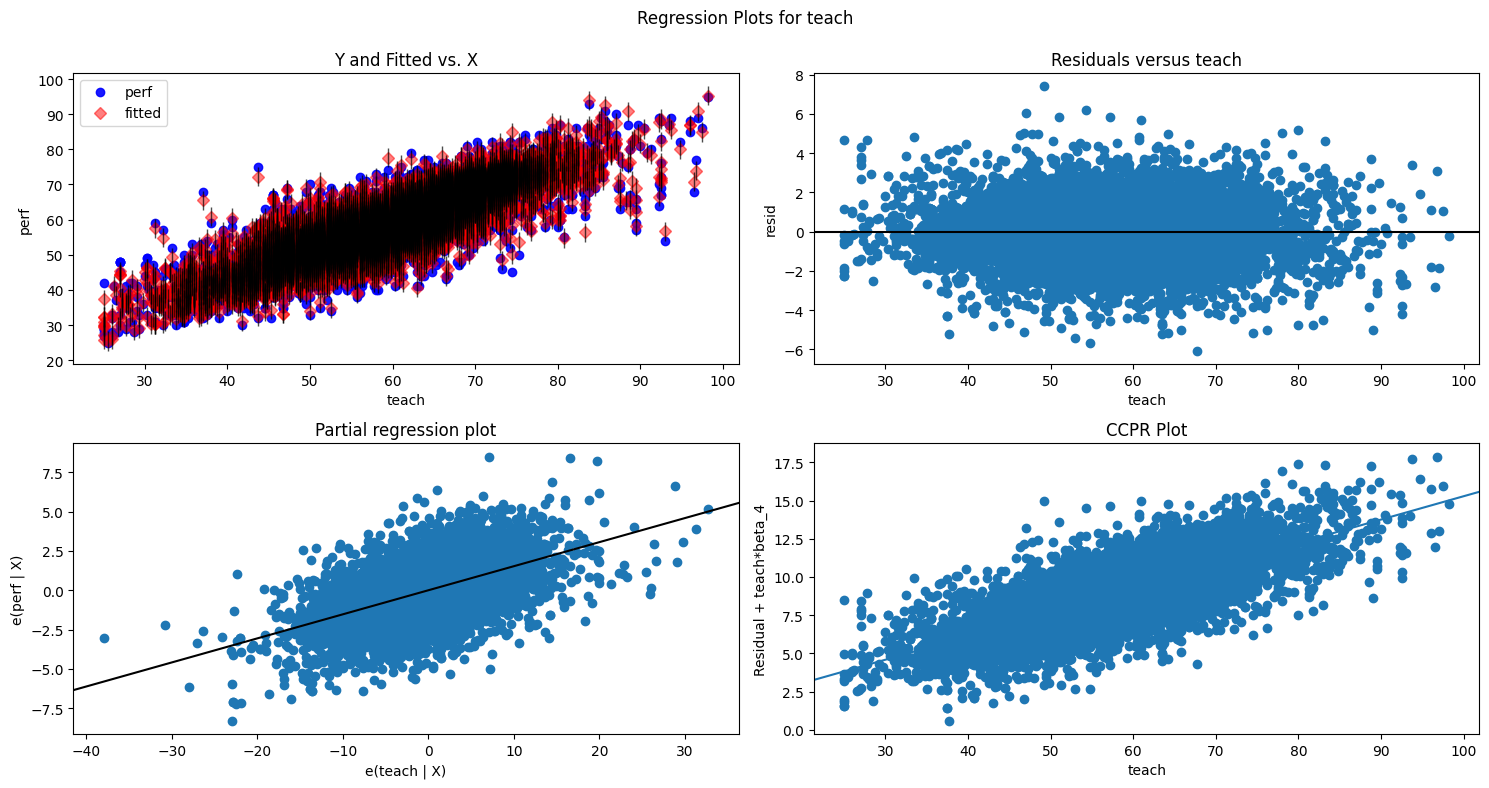

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'teach', fig = fig)
plt.show()

eval_env: 1


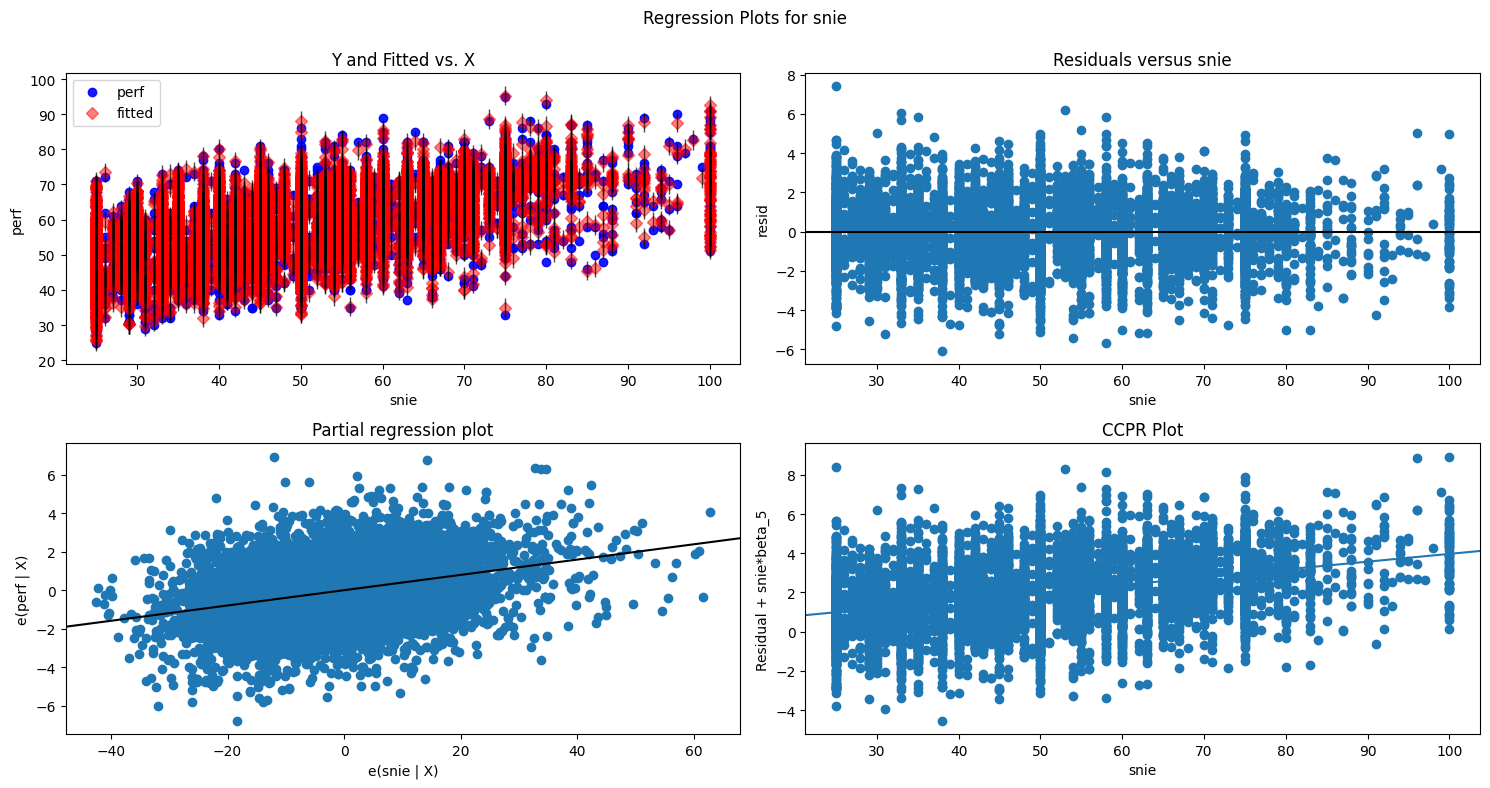

In [38]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'snie', fig = fig)
plt.show()

eval_env: 1


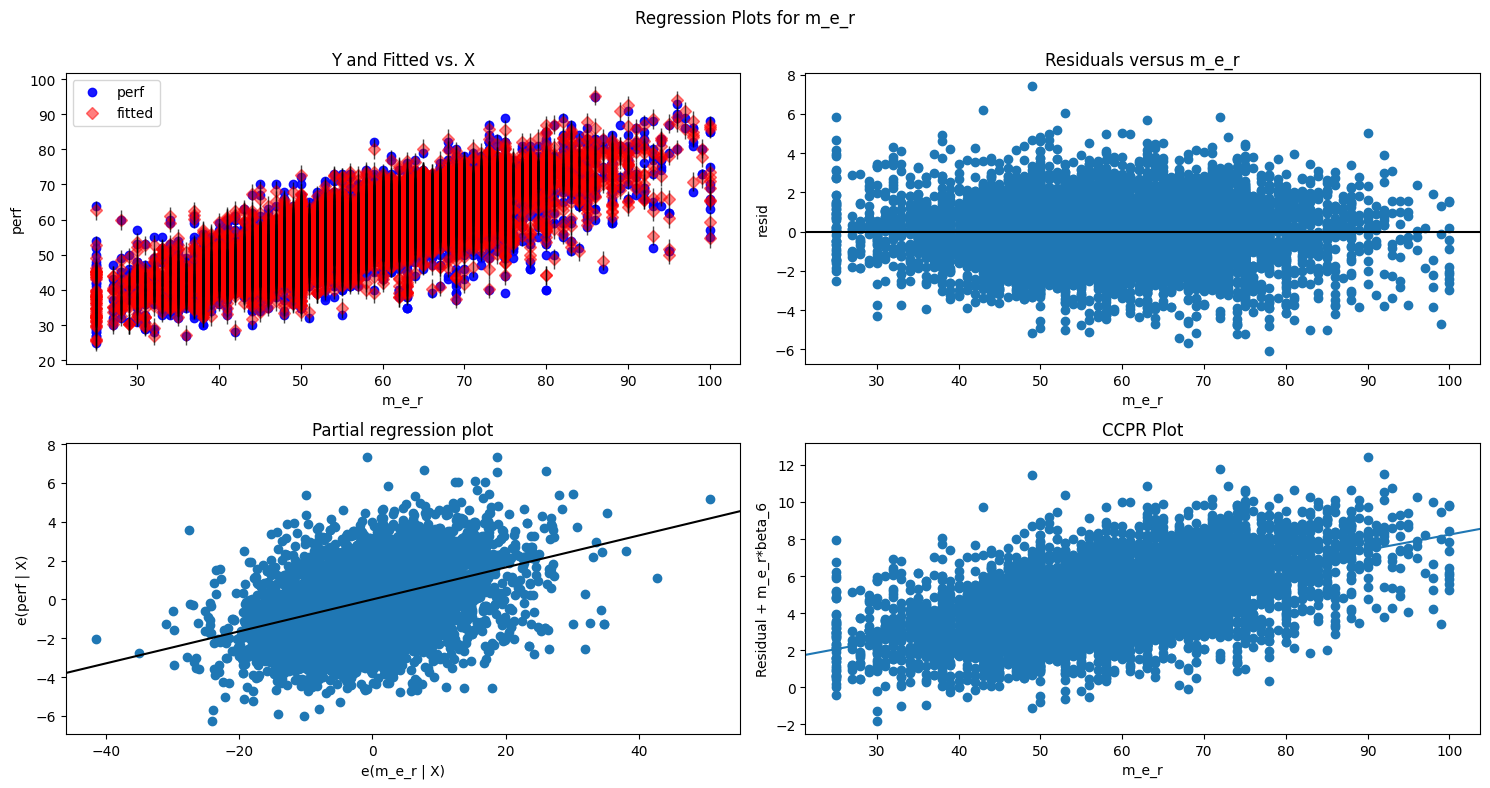

In [39]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'm_e_r', fig = fig)
plt.show()

eval_env: 1


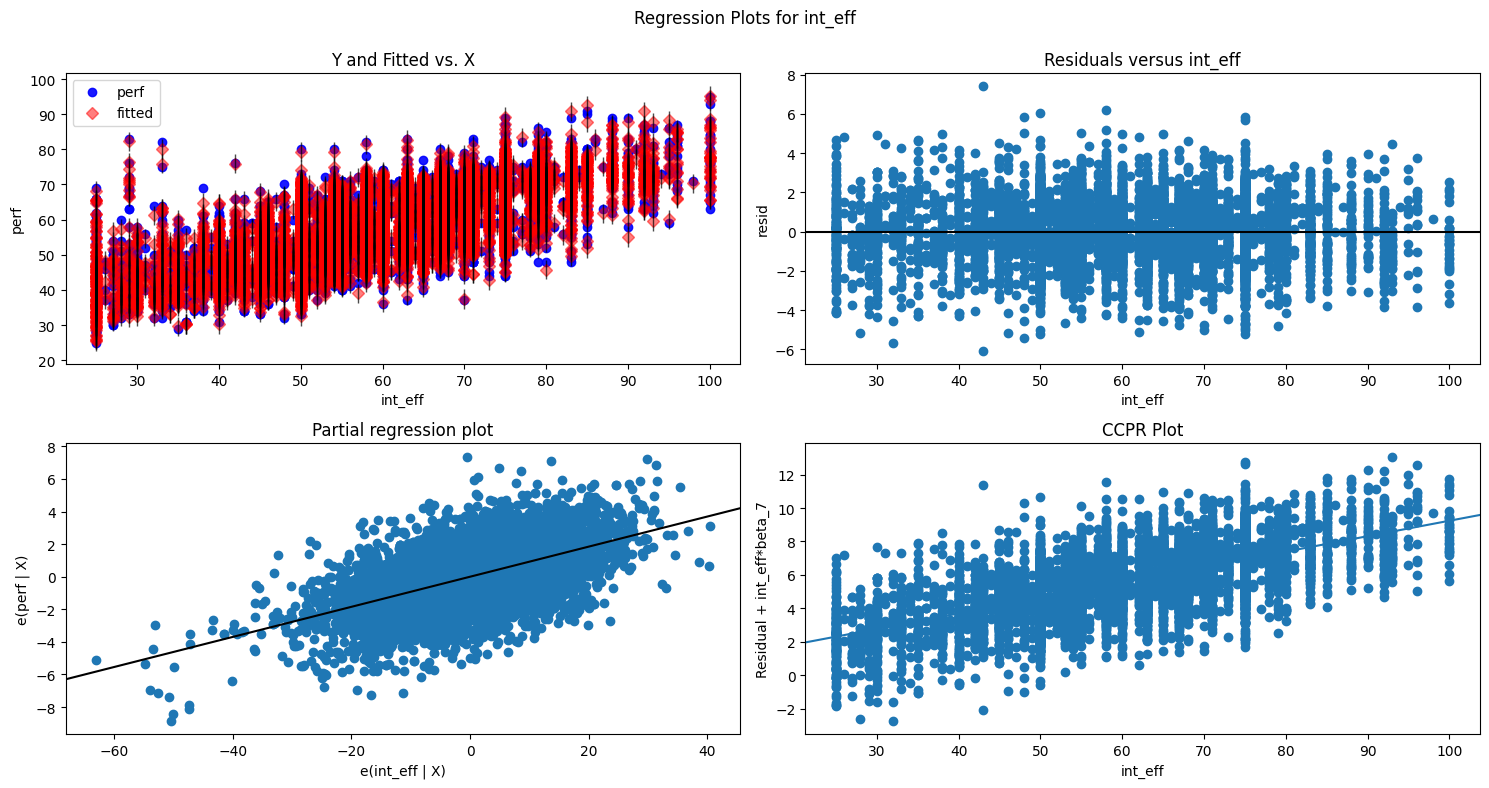

In [40]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'int_eff', fig = fig)
plt.show()

eval_env: 1


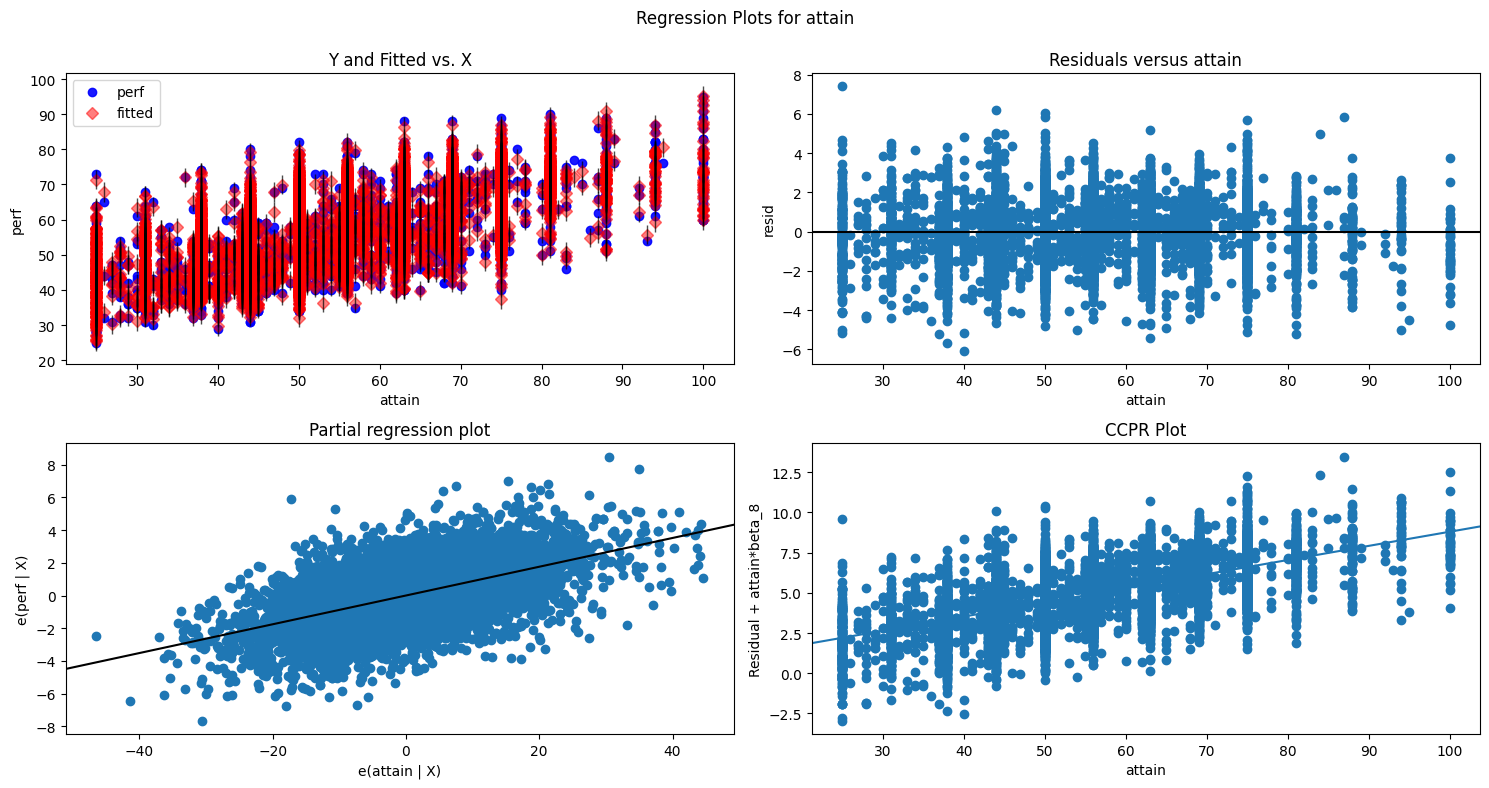

In [41]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'attain', fig = fig)
plt.show()

eval_env: 1


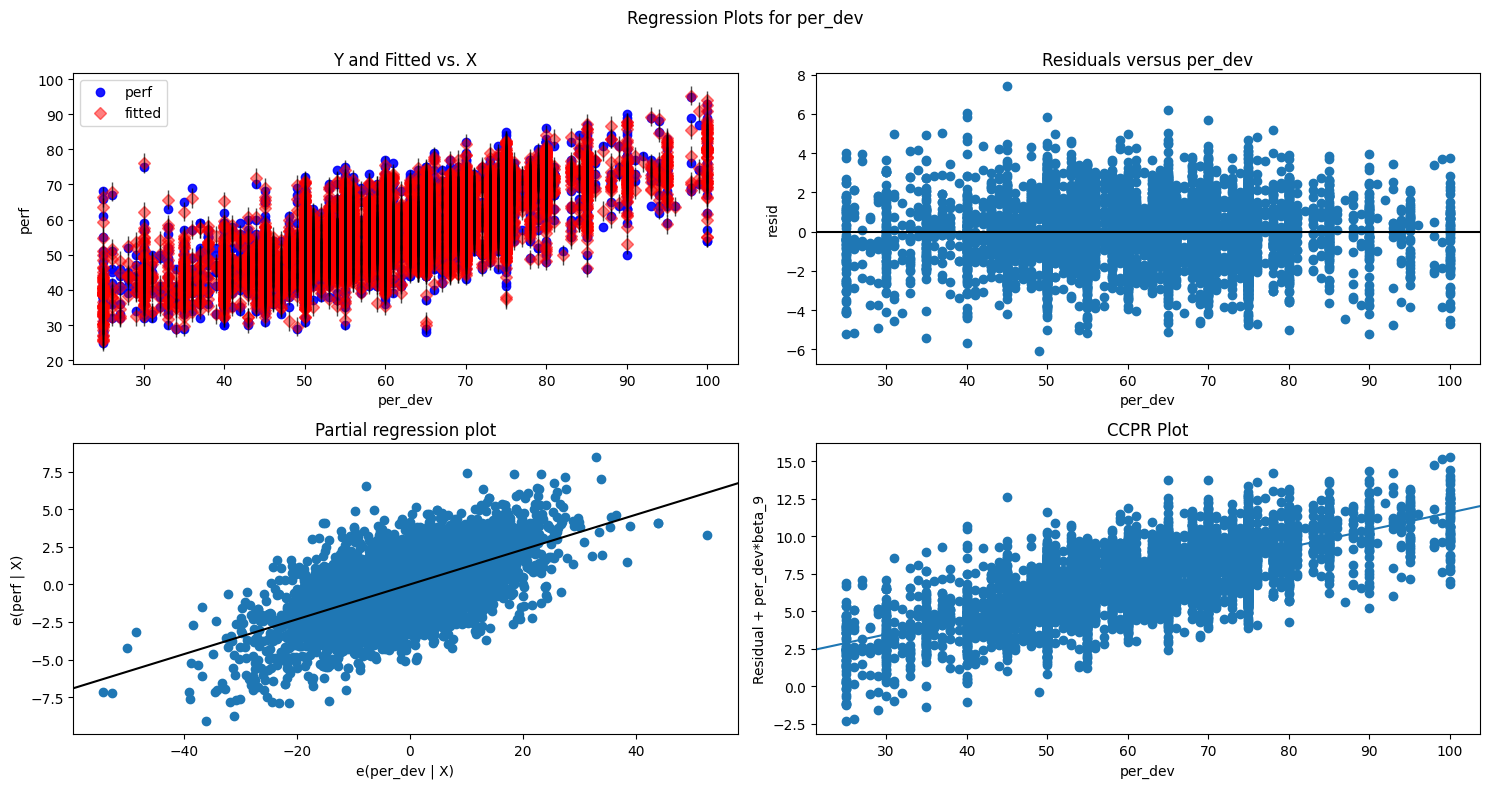

In [42]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'per_dev', fig = fig)
plt.show()

eval_env: 1


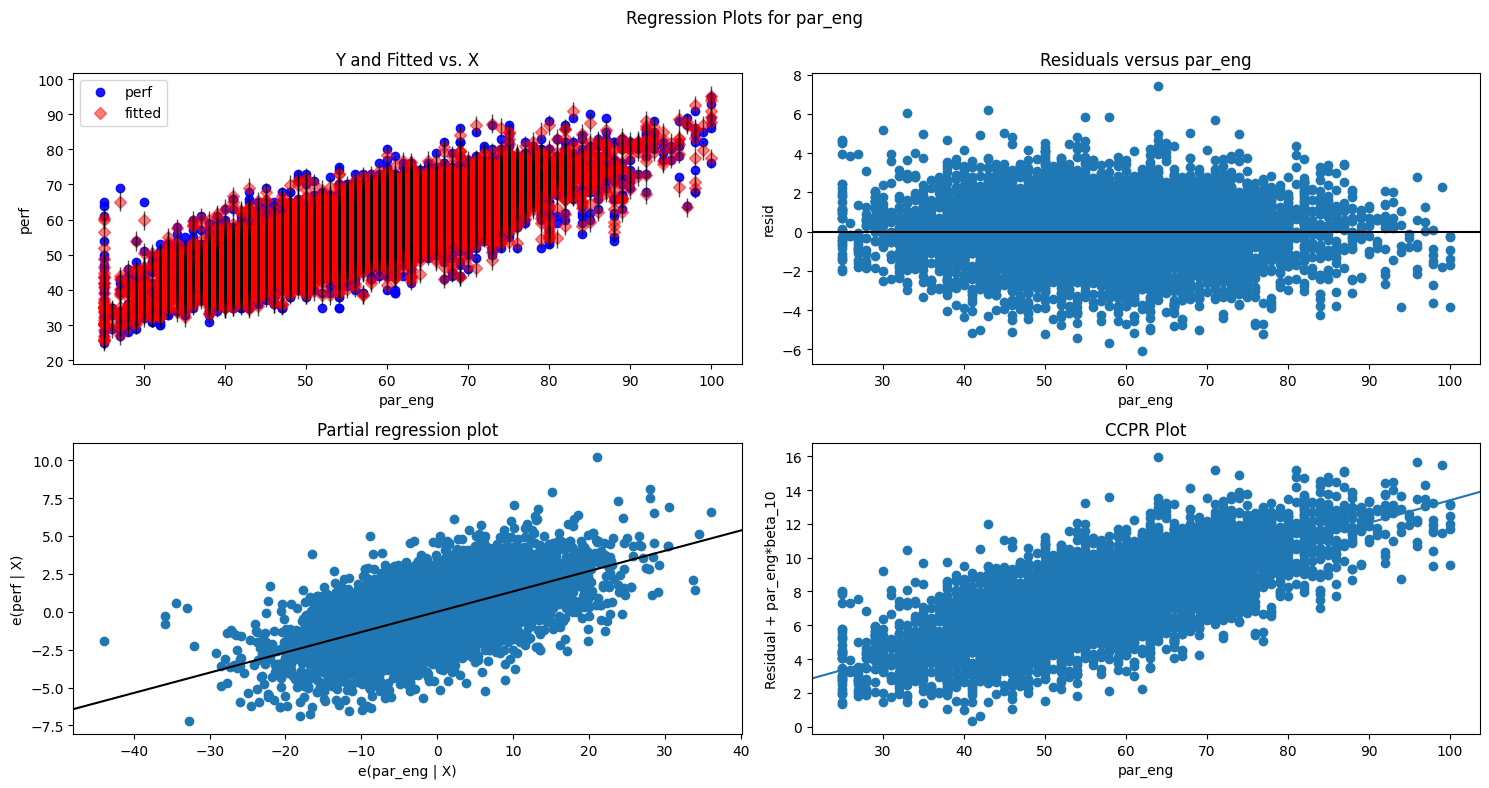

In [43]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'par_eng', fig = fig)
plt.show()

In [44]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Cook's Distance
#Leverage value

# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

In [45]:
(c,_) = model.get_influence().cooks_distance
c

array([7.31131250e-05, 5.38143374e-05, 4.05212125e-05, ...,
       1.62350936e-05, 5.15013575e-06, 9.28423148e-06])

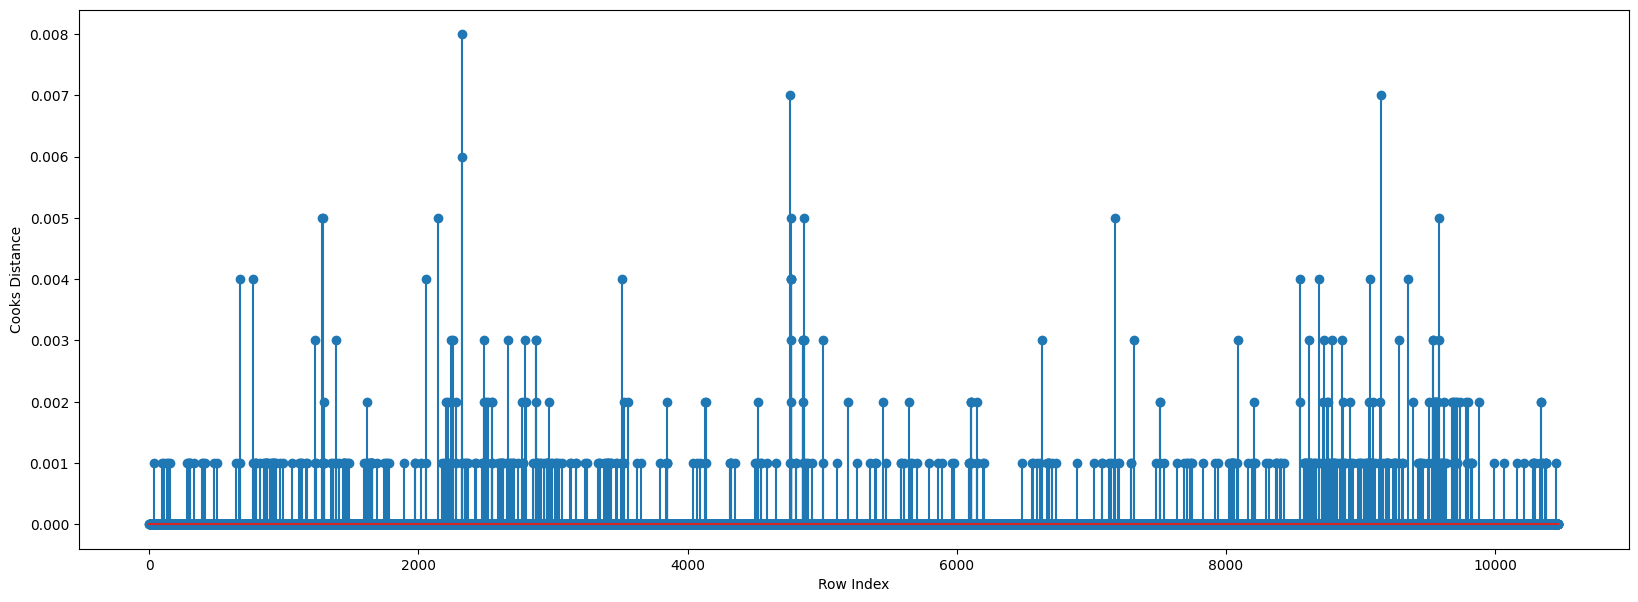

In [47]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(school_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# Copyright 2022 © Alamerewu Aklilu
                                email-> menadagi@gmail.com